In [2]:
from sklearn.datasets import fetch_20newsgroups
import sklearn.feature_extraction.text as ext

In [4]:
categories = ["comp.graphics", "misc.forsale", "rec.autos", "sci.space"] 

### Modell laden

Das Modell ist ein Objekt, das eine Liste von Kategorien und assoziierten Daten enthält. Das ist noch nicht tokenisiert und der Algorithmus ist auch nicht trainiert.

In [6]:
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

In [9]:
count_vect = ext.CountVectorizer()
count_vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

Fit_transform erzeugt eine Sparse-Matrix, eine Datenstruktur, die nur die Elemente speichert, die auch wirklich Dateneinträge enthalten. Die Funktion erzeugt das entsprechende Bag of Words zu twenty_train.data.

In [11]:
X_train_counts = count_vect.fit_transform(twenty_train.data) 
X_train_counts #sparse matrix with 312399 stored elements in Compressed Sparse Row format

<2356x34750 sparse matrix of type '<class 'numpy.int64'>'
	with 312399 stored elements in Compressed Sparse Row format>

In [12]:
X_train_counts.shape

(2356, 34750)

## N-Gramme

N-Gramm = kontinuierliche Folge von Elementen in einem Text. Diese Elemente können Silben, Buchstaben, Wörte sein. Das n steht für die Länge vom Gramm. 

Anwendung: 
- Vorhersage der nächsten Sequenz (Suchmaschine)
- DNA-Sequenzierung
- Datenkomprimierung

In [13]:
categories = ["sci.space"]

twenty_train = fetch_20newsgroups(subset='train', categories=categories, remove = ("headers", "footers", "quotes"), 
                                  shuffle=True, random_state=42)

In [18]:
count_chars = ext.CountVectorizer(analyzer="char_wb", ngram_range=(3,3), max_features = 10).fit(twenty_train["data"])
count_chars

CountVectorizer(analyzer='char_wb', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=10, min_df=1,
        ngram_range=(3, 3), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [17]:
count_words = ext.CountVectorizer(analyzer= "word", ngram_range = (2,2), max_features=10, stop_words="english").fit(twenty_train.data)

In [21]:
X = count_chars.transform(twenty_train.data)#sparse matrix

In [23]:
count_words.get_feature_names()

['anonymous ftp',
 'commercial space',
 'gamma ray',
 'nasa gov',
 'national space',
 'remote sensing',
 'sci space',
 'space shuttle',
 'space station',
 'washington dc']

In [24]:
count_chars.get_feature_names()

[' an', ' in', ' of', ' th', ' to', 'he ', 'ing', 'ion', 'nd ', 'the']

In [27]:
X[1].todense()

matrix([[0, 0, 2, 5, 1, 4, 2, 2, 0, 5]], dtype=int64)

In [28]:
count_words.get_feature_names()

['anonymous ftp',
 'commercial space',
 'gamma ray',
 'nasa gov',
 'national space',
 'remote sensing',
 'sci space',
 'space shuttle',
 'space station',
 'washington dc']

## TF-IDF Transformationen

In [29]:
categories = ["sci.space"]

twenty_train = fetch_20newsgroups(subset='train', categories=categories, remove = ("headers", "footers", "quotes"), 
                                  shuffle=True, random_state=42)

In [30]:
count_vect = ext.CountVectorizer()

In [31]:
X_train_counts = count_vect.fit_transform(twenty_train.data) #sparse matrix

In [33]:
tfidf = ext.TfidfTransformer().fit(X_train_counts)
tfidf

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [35]:
X_train_tfidf = tfidf.transform(X_train_counts)
X_train_tfidf.shape

(593, 13564)

## Graphen

In [39]:
import networkx as nx
import matplotlib.pyplot as plt

In [38]:
G = nx.cycle_graph(10)
print(G)
A = nx.adjacency_matrix(G)

A.todense()

cycle_graph(10)


matrix([[0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 0, 1, 0]], dtype=int32)

C:\Users\Diletta\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
C:\Users\Diletta\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
C:\Users\Diletta\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


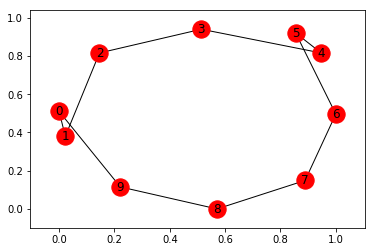

In [41]:
nx.draw_networkx(G)
plt.show()

C:\Users\Diletta\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
C:\Users\Diletta\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
C:\Users\Diletta\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


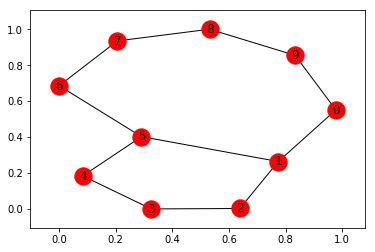

In [42]:
G.add_edge(1,5)
nx.draw_networkx(G)
plt.show()